<a href="https://colab.research.google.com/github/nelson123-lab/Virtual_paint/blob/color_picker/Transfer_learning_Tomato_leaf_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun May  2 13:33:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 46kB/s 


In [3]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
# from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [5]:
# resize all images to 224x224
IMAGE_SIZE = [224, 224]

train_path ='/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train'
valid_path ='/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/valid'

In [6]:
inception = InceptionV3(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

87916544/87910968 [==============================] - 1s 0us/step


In [7]:
#making all the layers as False
for layer in inception.layers:
  layer.trainable = False

In [8]:
# for getting the output classe
folders = glob('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/*')

In [9]:
folders

['/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus']

In [10]:
# our layers 
x = Flatten()(inception.output)

In [11]:
prediction = Dense(len(folders), activation = 'softmax')(x)

#create a model object
model = Model(inputs = inception.input, outputs = prediction)

In [12]:
model.summary()



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [13]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224,224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 18348 images belonging to 10 classes.


In [16]:
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224,224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 18348 images belonging to 10 classes.


In [17]:
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 10,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1147/1147 [==============================] - 10271s 9s/step - loss: 5.1014 - accuracy: 0.5915 - val_loss: 2.2276 - val_accuracy: 0.8186
Epoch 2/10
1147/1147 [==============================] - 585s 510ms/step - loss: 3.3699 - accuracy: 0.7871 - val_loss: 4.4170 - val_accuracy: 0.7635
Epoch 3/10
1147/1147 [==============================] - 575s 501ms/step - loss: 3.1870 - accuracy: 0.8133 - val_loss: 3.3164 - val_accuracy: 0.8312
Epoch 4/10
1147/1147 [==============================] - 581s 506ms/step - loss: 3.1092 - accuracy: 0.8373 - val_loss: 2.3191 - val_accuracy: 0.8701
Epoch 5/10
1147/1147 [==============================] - 597s 520ms/step - loss: 2.9490 - accuracy: 0.8538 - val_loss: 1.8788 - val_accuracy: 0.8954
Epoch 6/10
1147/1147 [==============================] - 594s 518ms/step - loss: 2.5615 - accuracy: 0.8717 - val_loss: 2.0902 - val_accuracy: 0.8906
Epoch 7/10
1147/1147 [==============================] - 586s 511ms/step - loss: 2.7561 - accuracy: 0.8732 - val_l

In [18]:
import matplotlib.pyplot as plt

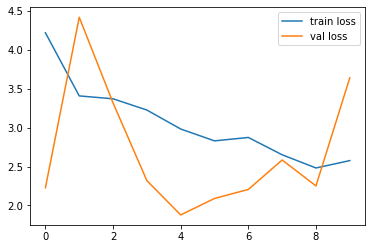

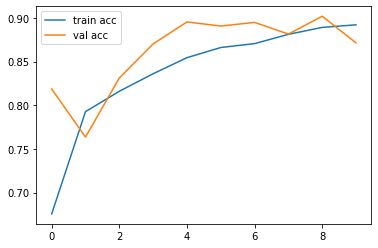

<Figure size 432x288 with 0 Axes>

In [23]:
#plot the loss
plt.plot(r.history['loss'],label ='train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#plot the accuracy 
plt.plot(r.history['accuracy'], label ='train acc')
plt.plot(r.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [24]:
from tensorflow.keras.models import load_model
model.save('model_inception.hS')

INFO:tensorflow:Assets written to: model_inception.hS/assets


In [25]:
y_pred = model.predict(test_set)

In [26]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        8.0217445e-01, 0.0000000e+00],
       ...,
       [0.0000000e+00, 1.7670589e-38, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.1515884e-18],
       [1.0000000e+00, 1.4042086e-22, 2.2506429e-27, ..., 3.0470995e-13,
        0.0000000e+00, 5.0873705e-10],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [27]:
import numpy as np
y_pred = np.argmax(y_pred, axis = 1)

In [28]:
y_pred

array([8, 4, 8, ..., 5, 0, 0])

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [30]:
model = load_model('model_resnet50.hS')

OSError: ignored

In [31]:
img_data

NameError: ignored